# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

At this project I try to scrap the data of exchange rate US Dollar to Rupiah from [Exchange Rate](https://www.exchange-rates.org/exchange-rate-history/usd-idr) website. Exchange Rate is a website that allows you to check the latest foreign exchange rates. The data is up to date and provided by one the financial leaders.

From this website, I will scrap the daily price and date using USD to IDR history data for last 6 months start from October 10, 2022 until April 7, 2023. After scrapping the data, I will wrangling the data and visualize the plot of exchange rate using the library from Python specifically Pandas.

The purpose of doing web scraping on the Exchange Rate web is to retrieve data on the exchange rate of USD to IDR to visualize it in a range per day

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [47]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [48]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [49]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [50]:
table = soup.find('table', attrs = {'class':'history-rates-data'})
print(table.prettify()[1:1500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-04-07">
     April 7, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-04-07">
     2023-4-7
    </a>
   </td>
   <td>
    <span class="w">
     <span class="nowrap">
      <span class="currencySymbol">
       $
      </span>
      1 =
     </span>
     <span class="nowrap">
      <span class="currencySymbol">
       Rp
      </span>
      14,941
     </span>
    </span>
    <span class="n">
     <span class="nowrap">
      <span class="currencySymbol">
       $
      </span>
      1 =
     </span>
     <span class="nowrap">
      <span class="currencySymbol">
       Rp
      </span>
      14,941
     </span>
    </span>
   </td>
  </tr>
  <tr class="odd

Finding row length.

In [51]:
row = table.find_all('a', attrs = {'class': 'n'})
row_length = len(row)
row_length

130

Do the scrapping process here (please change this markdown with your explanation)

In [52]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #get date
    date = table.find_all('a', attrs = {'class': 'n'})[i].text
    
    #get exchange rate and drop the unused string
    value = table.find_all('span', attrs = {'class':'n'})[i].text
    value = value.replace('$1 = Rp', '').replace(',', '').strip()
    
    temp.append((date, value))
    
temp 

[('2023-4-7', '14941'),
 ('2023-4-6', '14931'),
 ('2023-4-5', '14960'),
 ('2023-4-4', '14957'),
 ('2023-4-3', '14922'),
 ('2023-3-31', '14969'),
 ('2023-3-30', '15024'),
 ('2023-3-29', '15034'),
 ('2023-3-28', '15060'),
 ('2023-3-27', '15107'),
 ('2023-3-24', '15165'),
 ('2023-3-23', '15085'),
 ('2023-3-22', '15253'),
 ('2023-3-21', '15301'),
 ('2023-3-20', '15343'),
 ('2023-3-17', '15375'),
 ('2023-3-16', '15429'),
 ('2023-3-15', '15459'),
 ('2023-3-14', '15380'),
 ('2023-3-13', '15416'),
 ('2023-3-10', '15503'),
 ('2023-3-9', '15495'),
 ('2023-3-8', '15449'),
 ('2023-3-7', '15429'),
 ('2023-3-6', '15354'),
 ('2023-3-3', '15278'),
 ('2023-3-2', '15322'),
 ('2023-3-1', '15249'),
 ('2023-2-28', '15241'),
 ('2023-2-27', '15216'),
 ('2023-2-24', '15265'),
 ('2023-2-23', '15211'),
 ('2023-2-22', '15197'),
 ('2023-2-21', '15235'),
 ('2023-2-20', '15168'),
 ('2023-2-17', '15166'),
 ('2023-2-16', '15144'),
 ('2023-2-15', '15205'),
 ('2023-2-14', '15186'),
 ('2023-2-13', '15216'),
 ('2023-2-10

## Creating data frame & Data wrangling

Put the array into dataframe

In [59]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date', 'Exchange Rate'))
df.head()

,Date,Exchange Rate
0,2023-4-7,14941
1,2023-4-6,14931
2,2023-4-5,14960
3,2023-4-4,14957
4,2023-4-3,14922


In [63]:
df.dtypes

Date             datetime64[ns]
Exchange Rate             int64
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [61]:
df['Date'] = df['Date'].astype('datetime64')
df['Exchange Rate'] = df['Exchange Rate'].astype('int64')

In [62]:
df_for_plot = df.set_index('Date')
df_for_plot

,Exchange Rate
Date,
2023-04-07,14941
2023-04-06,14931
2023-04-05,14960
2023-04-04,14957
2023-04-03,14922
...,...
2022-10-14,15472
2022-10-13,15372
2022-10-12,15319


I change the data types of each column and set the index with Date Column. With the new data frame ```df_for_plot```, I make a data visualisation like in below.

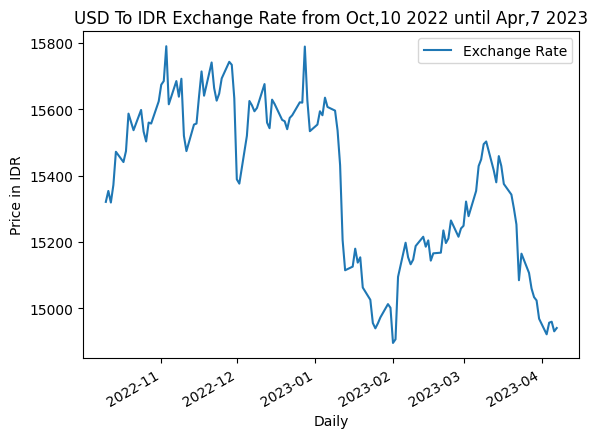

In [66]:
df_for_plot.plot(
    title = 'USD To IDR Exchange Rate from Oct,10 2022 until Apr,7 2023',
    xlabel = 'Daily',
    ylabel = 'Price in IDR'
);

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [71]:
df_for_plot.sort_values(by = 'Exchange Rate', ascending = True).head(1)

,Exchange Rate
Date,
2023-02-01,14896


From the plot, I can conclude that the lowest USD price in IDR is on February 2023. I sort that data frame base on Exchange Rate column from the lowest or ascending to get the exact value. And that is, **February 1, 2023 is the lowest USD price in IDR which was Rp 14.986**

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.